In [16]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [17]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [18]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0, squeeze=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_16684\1180074472.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0, squeeze=True)


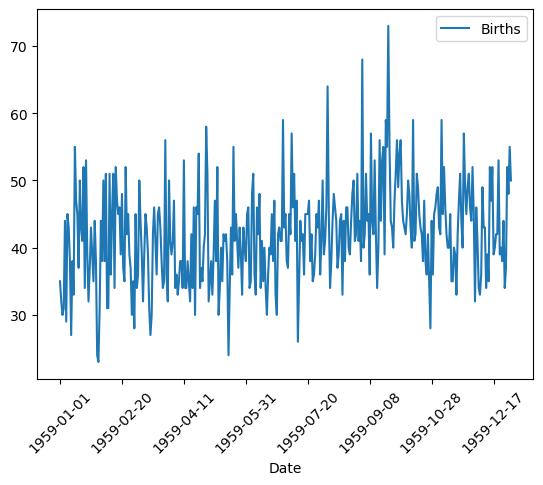

In [19]:
series.plot(legend=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [20]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [21]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


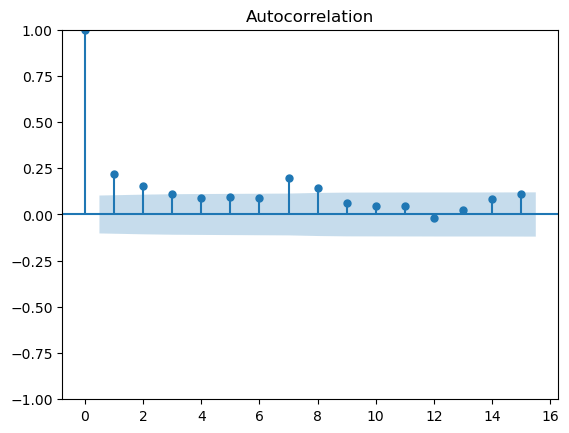

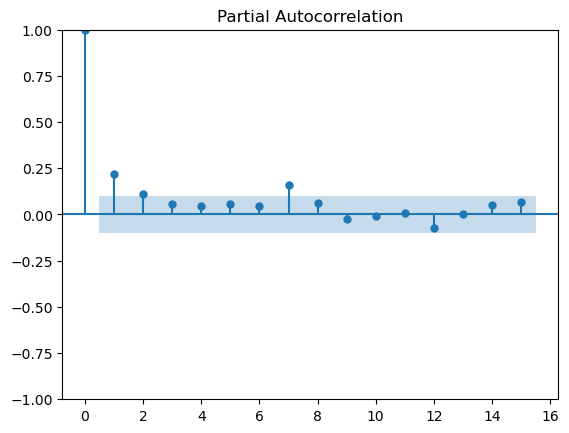

In [22]:
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

# We can check AR(1), AR(2), AR(7)

In [23]:
ar_orders = [1, 2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [24]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 2479.0806278346026
AIC for AR(2): 2476.363657107163
AIC for AR(7): 2472.778262629023


In [25]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.78031989535
BIC for AR(2): 2491.9632465214927
BIC for AR(7): 2507.8773388112654


# If we treat this as a ARMA process

In [26]:
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [27]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 2468.90579803311, BIC: 2484.5053874474397
ARMA(1,2) - AIC: 2466.7240379009872, BIC: 2486.2235246688997
ARMA(2,1) - AIC: 2466.2832664560556, BIC: 2485.782753223968
ARMA(2,2) - AIC: 2467.697857835833, BIC: 2491.097241957328


In [43]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [44]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\admin\AppData\Local\Temp\ipykernel_15196\2160245714.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [45]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [46]:
perform_adf_test(series)


ADF Statistic: -7.162321
p-value: 0.000000


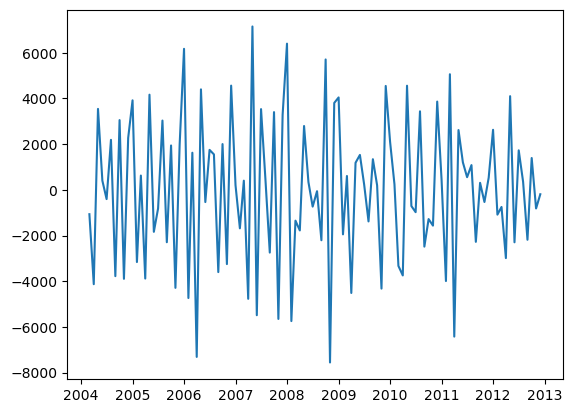

In [47]:
plt.plot(series)


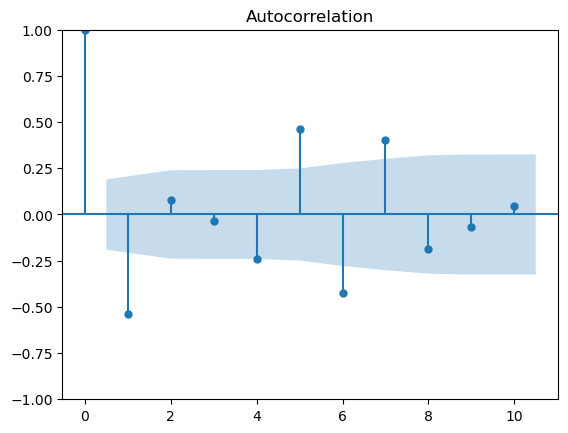

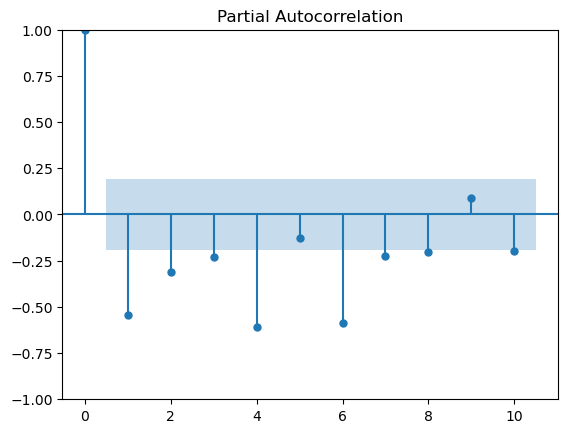

In [50]:
plot_acf(series, lags=10)
plot_pacf(series, lags=10)

plt.show()


In [52]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


In [53]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660582
AIC for AR(6): 1899.6497441386373
AIC for AR(10): 1902.376545014111


In [54]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))


BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198307305
BIC for AR(6): 1920.957256891534
BIC for AR(10): 1934.3378141434557
